In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import matplotlib.colors as plt_colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import nan
from numpy import isnan

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.model_selection import train_test_split                # train and test split
from sklearn.metrics import mean_squared_error, r2_score            # specific measures to check our models
from sklearn import linear_model

In [2]:
#df = pd.read_csv('TrainData_with_recovered_estimated_time.csv')
df_time = pd.read_csv('TrainData_recovered_forest_main.csv')
df = pd.read_csv('TrainData_with_recovered_estimated_time.csv')
df_clean = df.drop('Actual Average Stage Time', axis=1)
df_clean['Estimated Average Stage Time'] = df_time['Estimated Average Stage Time']
#df_dropped = df.drop(df.columns.difference(['Estimated Average Stage Time','Ambient Temperature', 'Grid', 'Diesel', 'CNG']), 1, inplace=True)
#df_clean = df.loc[:, df.columns.intersection(['Estimated Average Stage Time','Ambient Temperature', 'Grid', 'Diesel', 'CNG'])]

In [3]:
n = len(df_clean.columns)
X = df_clean.loc[:,(df_clean.columns != "Grid") & (df_clean.columns != "Diesel") & (df_clean.columns != "CNG")].to_numpy()
y = df_clean.iloc[:,2:5].to_numpy()

Text(0.5, 0, 'Relative Importance')

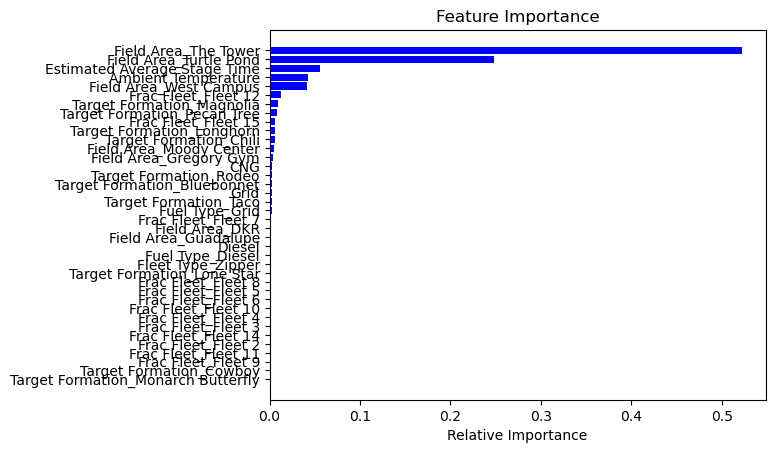

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
randreg = RandomForestRegressor()
randreg.fit(X_train,y_train)
features = df_clean.columns[:-1]
importances = randreg.feature_importances_
indices = np.argsort(importances)
plt.figure(3) #the axis number
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [5]:
df_important = df.loc[:, df.columns.intersection(['Estimated Average Stage Time','Ambient Temperature', 'Field Area_Turtle Pond', 'Field Area_The Tower', 'Field Area_West Campus'])]

n = len(df_important.columns)
X = df_important.iloc[:,0:n-1] #.to_numpy()
y = df_important.iloc[:,2:4] #.to_numpy()
df_important.columns
print(X)

      Estimated Average Stage Time  Ambient Temperature  Field Area_The Tower  \
0                        -0.514111            -1.999136                 False   
1                        -0.514111            -1.999136                 False   
2                        -0.955599            -1.856120                 False   
3                        -0.955599            -1.856120                 False   
4                        -0.955599            -1.856120                 False   
...                            ...                  ...                   ...   
1077                      0.461811             1.524259                 False   
1078                      0.461811             1.524259                 False   
1079                      0.461811             1.524259                 False   
1080                      0.461811             1.524259                 False   
1081                      0.461811             1.524259                 False   

      Field Area_Turtle Pon

In [6]:
from sklearn.linear_model import Ridge
lm = Ridge(alpha=0.01)
scores = cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=10)
print(-scores)
print("Av MSE")
print(-scores.mean())

[4.20091216e-09 1.96739870e-09 1.10623690e-10 2.25684988e-09
 2.02128364e-10 2.15086003e-10 5.77922367e-09 7.82565538e-09
 1.11520959e-08 5.97265019e-09]
Av MSE
3.968262396570203e-09


In [7]:
from sklearn.linear_model import Lasso
lm = Lasso(alpha=0.01)
scores = cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=10)
print(-scores)
print("Av MSE")
print(-scores.mean())

[0.00386047 0.00191062 0.0001098  0.00193026 0.00010986 0.00011507
 0.00541911 0.00703694 0.01040098 0.00508764]
Av MSE
0.003598075287009269


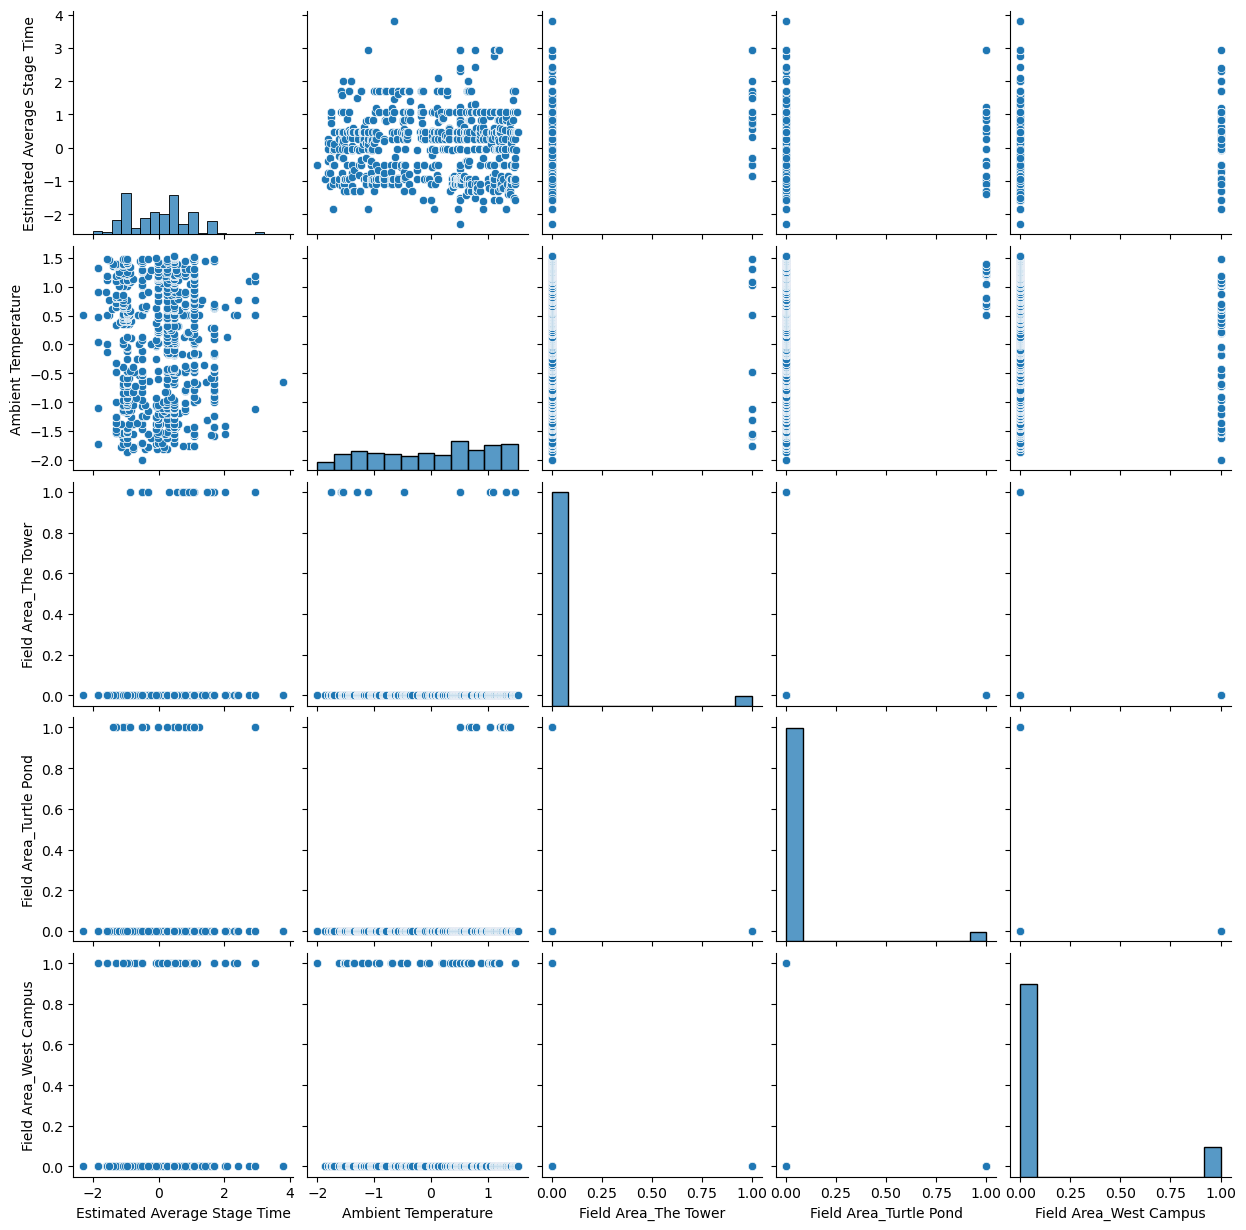

In [8]:
sns.pairplot(df_important.iloc[:,0:n])

In [9]:
from sklearn.preprocessing import StandardScaler            # standardize the features
scaler = StandardScaler()                                   # instantiate the scaler 
sfeatures = scaler.fit_transform(df_important.values)              # standardize all the values extracted from the DataFrame 
df_nmv = pd.DataFrame()                                     # instantiate a new DataFrame
df_nmv = pd.DataFrame(sfeatures, index=df_important.index, columns=df_important.columns) # copy the standardized values into the new DataFrame
df_nmv.head()                                               # preview the the new DataFrame

,Estimated Average Stage Time,Ambient Temperature,Field Area_The Tower,Field Area_Turtle Pond,Field Area_West Campus
0,-0.569864,-1.999136,-0.205886,-0.208313,2.552232
1,-0.569864,-1.999136,-0.205886,-0.208313,2.552232
2,-1.021556,-1.856120,-0.205886,-0.208313,-0.391814
3,-1.021556,-1.856120,-0.205886,-0.208313,-0.391814
4,-1.021556,-1.856120,-0.205886,-0.208313,-0.391814


In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score

df_nmv.describe().transpose()     
RidgeRegression = Ridge()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
complete_model = ridgeRegressor.fit(X_train,y_train)

In [11]:
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

#lm.fit(X_train,y_train)                             # train the model with the training data
# X_train, X_test, y_train, y_test = train_test_split(df_nmv.iloc[:,:3], pd.DataFrame({'cum_oil_3y':df_nmv['cum_oil_3y']}), test_size=0.15, random_state=73073)
# print('Number of training data = ' + str(len(X_train)) + ' and number of testing data = ' + str(len(X_test)))
#print(df_nmv)

Best value for lambda :  {'alpha': 0.01}
Best score for cost function:  -0.14039137013382813


In [12]:
predict_ridge = ridgeRegressor.predict(X_test)

<Axes: ylabel='Density'>

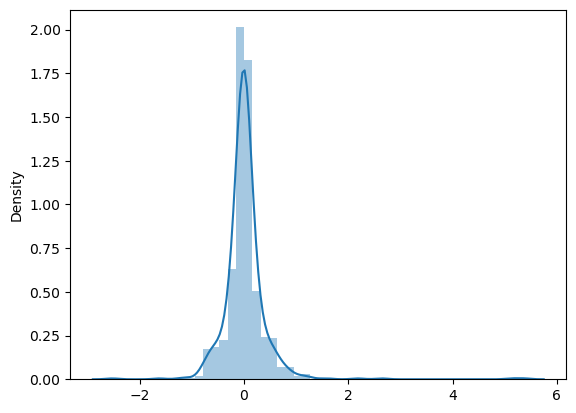

In [13]:
sns.distplot(y_test-predict_ridge)

In [14]:
test_data_ex = pd.read_csv('mercer_testing.csv')
test_data_ex.head()

#test_bad = test_data_ex.dropna(subset=['Estimated Average Stage Time'])

#print(test_bad.to_string())

,# Stages,Estimated Average Stage Time,Ambient Temperature
0,37,0.709132,74.500000
1,43,0.230288,60.100000
2,60,-0.075733,84.900000
3,76,1.071844,81.100000
4,50,-1.022484,80.080961


In [15]:
testing = test_data_ex.loc[:,(test_data_ex.columns != "Grid") & (test_data_ex.columns != "Diesel") & (test_data_ex.columns != "CNG")] #.to_numpy()
testing.head(n=100)

,# Stages,Estimated Average Stage Time,Ambient Temperature
0,37,0.709132,74.500000
1,43,0.230288,60.100000
2,60,-0.075733,84.900000
3,76,1.071844,81.100000
4,50,-1.022484,80.080961
5,51,-1.022484,85.300000
6,66,-0.979449,72.200000
7,50,0.435895,67.500000
8,82,1.707793,79.800000
9,49,-0.075733,71.100000


In [16]:
predicted_values = complete_model.predict(testing)

print(predicted_values)

ValueError: X has 3 features, but Ridge is expecting 38 features as input.